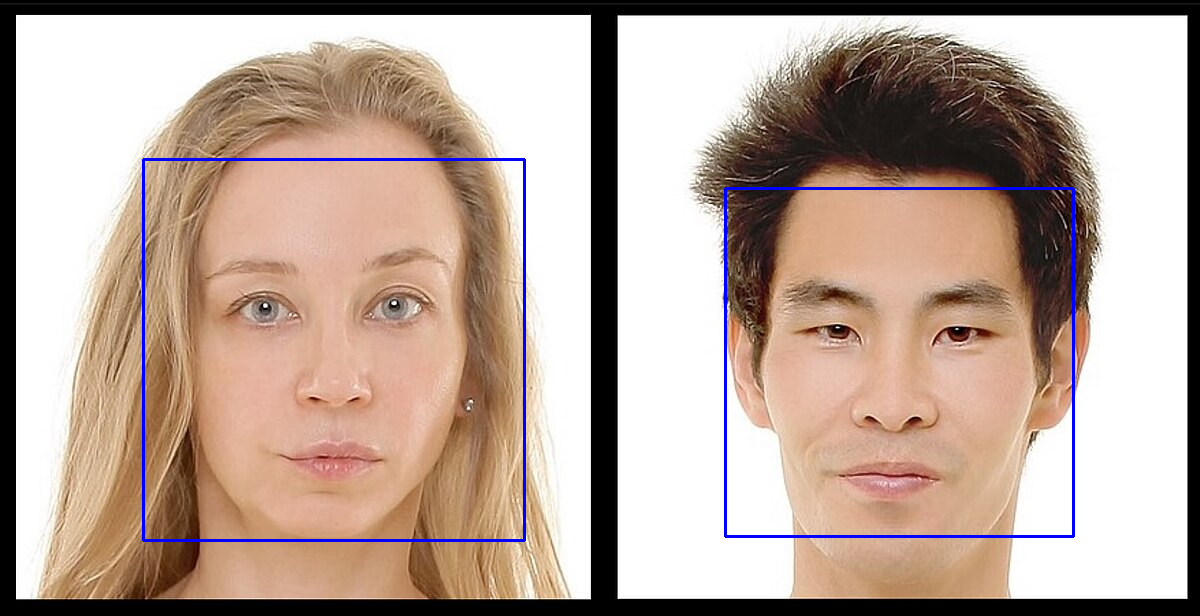

In [1]:
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
image = cv2.imread('/content/Human_faces.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with detected faces
cv2_imshow(image)


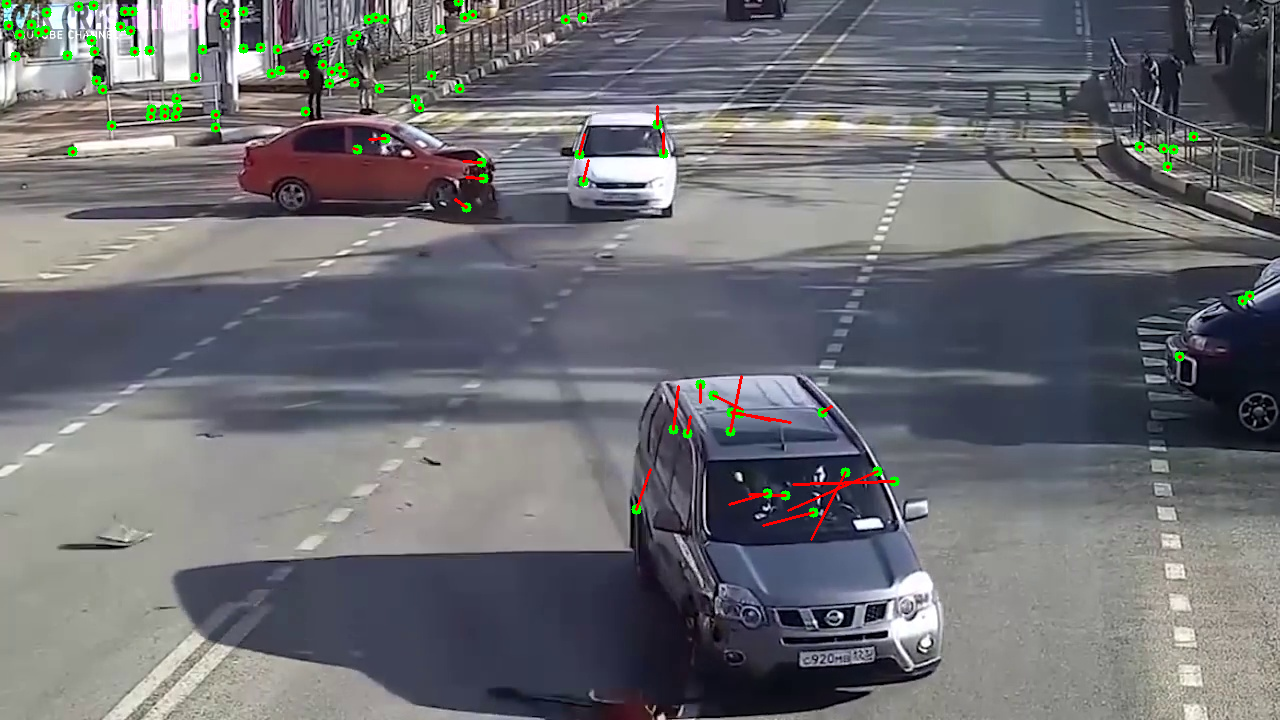

In [3]:
import numpy as np
import cv2
# Load the two consecutive frames
frame1 = cv2.imread('/content/test_38.jpg')
frame2 = cv2.imread('/content/test_42.jpg')
 #Convert frames to grayscale
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
# Parameters for Lucas-Kanade optical flow
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


# Define initial points for tracking
p0 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)


# Perform Lucas-Kanade optical flow
p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)


# Select good points
good_new = p1[st == 1]
good_old = p0[st == 1]
# Draw the tracks
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel().astype(int)  # Convert to integers
    c, d = old.ravel().astype(int)  # Convert to integers
    frame2 = cv2.circle(frame2, (a, b), 5, (0, 255, 0), -1)
    frame2 = cv2.line(frame2, (a, b), (c, d), (0, 0, 255), 2)


from google.colab.patches import cv2_imshow


# Display the result
cv2_imshow( frame2)